In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset after covnverting it to a .csv format manually
data = pd.read_csv('Auto.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
median_mpg = data['mpg'].median()
print(median_mpg)
data["mpg01"] = np.where(data['mpg'] > median_mpg,1, 0)
data.head()

23.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [5]:
data = data.drop(['name', 'mpg'], axis=1)

In [6]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [7]:
data['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 397, dtype: float64

In [8]:
data['horsepower'].isnull().sum()

5

In [9]:
data.fillna(data.mean(), inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     397 non-null    int64  
 1   displacement  397 non-null    float64
 2   horsepower    397 non-null    float64
 3   weight        397 non-null    int64  
 4   acceleration  397 non-null    float64
 5   year          397 non-null    int64  
 6   origin        397 non-null    int64  
 7   mpg01         397 non-null    int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [11]:
data['origin'].unique()

array([1, 3, 2], dtype=int64)

In [12]:
data['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [13]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [14]:
#Changing variables as categorical
data["origin"]=data["origin"].astype("category")
data["year"]=data["year"].astype("category")

In [15]:
y = data['mpg01']

X = data.drop(['mpg01'], axis=1)

In [16]:
#introducing dummy variables.
X=pd.get_dummies(X,prefix="Cat")

X.head()

,cylinders,displacement,horsepower,weight,acceleration,Cat_70,Cat_71,Cat_72,Cat_73,Cat_74,...,Cat_76,Cat_77,Cat_78,Cat_79,Cat_80,Cat_81,Cat_82,Cat_1,Cat_2,Cat_3
0,8,307.0,130.0,3504,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8,350.0,165.0,3693,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,8,318.0,150.0,3436,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8,304.0,150.0,3433,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,302.0,140.0,3449,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
scaler=MinMaxScaler();
scaler=scaler.fit(X)

scaledData=scaler.transform(X)

In [18]:
X =pd.DataFrame(scaledData,columns=X.columns)

In [19]:
X

,cylinders,displacement,horsepower,weight,acceleration,Cat_70,Cat_71,Cat_72,Cat_73,Cat_74,...,Cat_76,Cat_77,Cat_78,Cat_79,Cat_80,Cat_81,Cat_82,Cat_1,Cat_2,Cat_3
0,1.0,0.617571,0.456522,0.536150,0.238095,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.2,0.186047,0.217391,0.333711,0.452381,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
393,0.2,0.074935,0.032609,0.146583,0.988095,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
394,0.2,0.173127,0.206522,0.193365,0.214286,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
395,0.2,0.134367,0.179348,0.286929,0.630952,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [20]:
#def clean_dataset(df):
#    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#    df.dropna(inplace=True)
#    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#    return df[indices_to_keep].astype(np.float64)
#clean_dataset(X)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


SVM model C = 1
Accuracy:0.9375 
Cross Validation Error: 0.2367088607594937
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.94      0.92      0.93        36

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



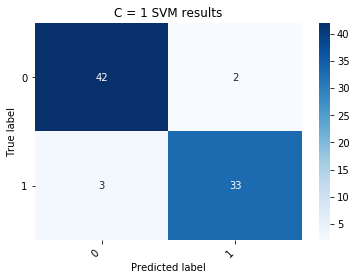




SVM model C = 2
Accuracy:0.9125 
Cross Validation Error: 0.264493670886076
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.94      0.86      0.90        36

    accuracy                           0.91        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



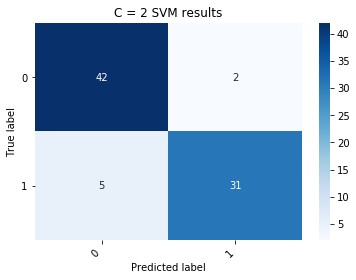




SVM model C = 3
Accuracy:0.9125 
Cross Validation Error: 0.2569620253164556
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.94      0.86      0.90        36

    accuracy                           0.91        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



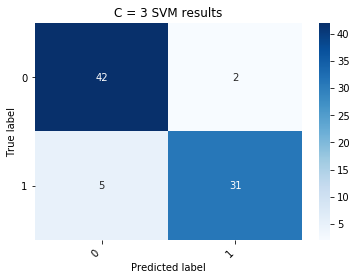




SVM model C = 4
Accuracy:0.9125 
Cross Validation Error: 0.259493670886076
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.94      0.86      0.90        36

    accuracy                           0.91        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



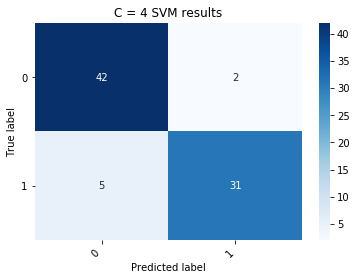




SVM model C = 5
Accuracy:0.925 
Cross Validation Error: 0.24936708860759504
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.94      0.89      0.91        36

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



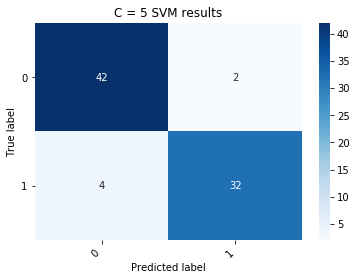




SVM model C = 10
Accuracy:0.9375 
Cross Validation Error: 0.2267088607594937
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.94      0.92      0.93        36

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



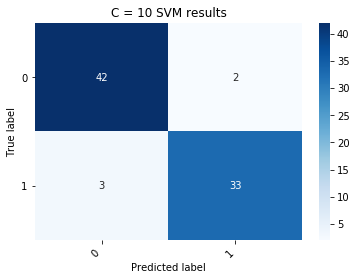

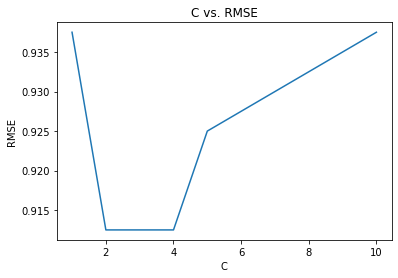

In [33]:
C_try = [1,2,3,4,5,10]
rmm = []
for i in C_try:
    
    #Initializing a SVM 
    model = SVC(kernel = 'linear', C = i)
    
    #Fitting model using best parameters
    model.fit(X_train, y_train)
    
    #Predicting values using said parameters
    y_pred = model.predict(X_test)
    
    print('SVM model C = '+str(i))
    #Saving accuracy score of the model in a list
    print('Accuracy:{} '.format(accuracy_score(y_test, y_pred)))
    
   
    scores = cross_val_score(model, X, y, cv=5)
    
    rmm.append(model.score(X_test, y_test))
    print('Cross Validation Error: {}'.format(str(1 - scores.mean())))
    
    print(classification_report(y_test, y_pred))

    confusion = confusion_matrix(y_test, y_pred)
    
    classnames = list(set(y_train))
    
    #creating a data frame containing confusion matrix data
    dataplot = pd.DataFrame(np.mat(confusion), index=classnames, columns=classnames)
    
    #Plotting a graph on the confusion matrix data
    plt.figure()
    heatmap = sns.heatmap(dataplot, annot=True, cmap="Blues")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('C = '+ str(i) + ' SVM results')
    plt.show()    
    print("\n\n")

plt.plot(C_try, rmm)
plt.title('C vs. RMSE')
plt.xlabel('C')
plt.ylabel('RMSE')
plt.show()



We can see that the RMSE value is lowest, since accuracy is high for C = 1 and C = 10 from the graph above.

SVM model d = 1
Accuracy:0.95 
Cross Validation Error: 0.22158227848101275
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.94      0.94      0.94        36

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



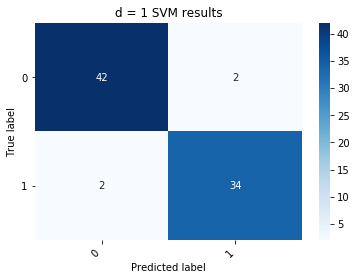




SVM model d = 2
Accuracy:0.9125 
Cross Validation Error: 0.254240506329114
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.91      0.89      0.90        36

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



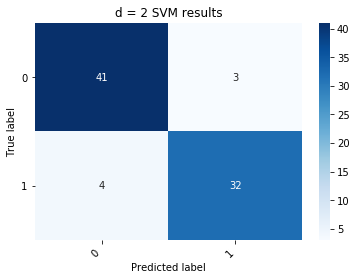




SVM model d = 3
Accuracy:0.9125 
Cross Validation Error: 0.277373417721519
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.91      0.89      0.90        36

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



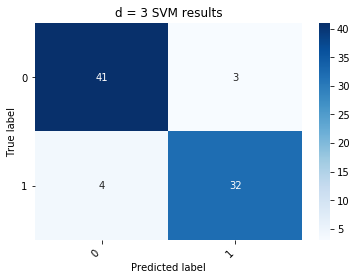




SVM model d = 4
Accuracy:0.9125 
Cross Validation Error: 0.31787974683544307
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.89      0.92      0.90        36

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



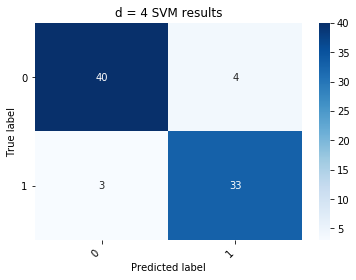




SVM model d = 5
Accuracy:0.9125 
Cross Validation Error: 0.3431012658227848
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.89      0.92      0.90        36

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



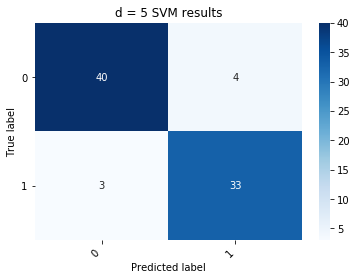




SVM model d = 6
Accuracy:0.9125 
Cross Validation Error: 0.3557911392405063
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.89      0.92      0.90        36

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



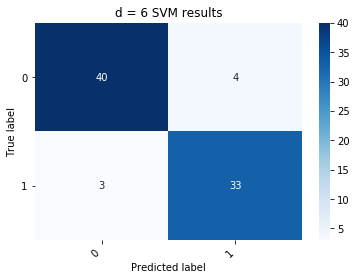




SVM model d = 8
Accuracy:0.925 
Cross Validation Error: 0.345506329113924
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.92      0.92      0.92        36

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



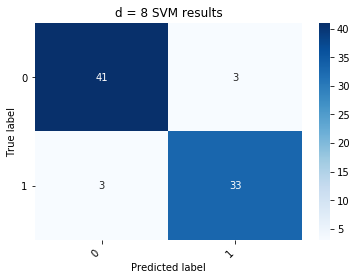




SVM model d = 10
Accuracy:0.9125 
Cross Validation Error: 0.36306962025316447
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.91      0.89      0.90        36

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



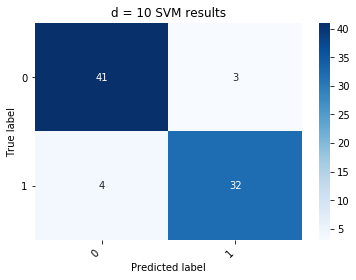




SVM model d = 15
Accuracy:0.925 
Cross Validation Error: 0.38079113924050634
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.89      0.94      0.92        36

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



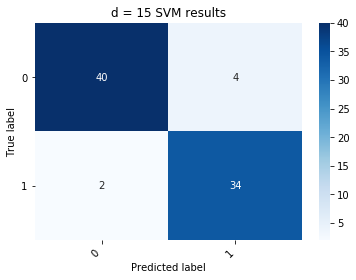

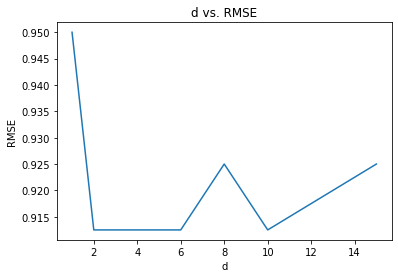

In [38]:
#Choosing the d to iterate on
d_try = [ 1, 2, 3, 4, 5, 6, 8, 10, 15]

RMM1 = []
for i in d_try:
    
    
     #Initializing a SVM 
    model = SVC(kernel = 'poly', C = 1, degree = i)
    
    #Fitting model using d values
    model.fit(X_train, y_train)
    
    #Predicting values using said parameters
    y_pred = model.predict(X_test)
    
    print('SVM model d = '+str(i))
    #Saving accuracy score of the model in a list
    print('Accuracy:{} '.format(accuracy_score(y_test, y_pred)))
    
   
    scores = cross_val_score(model, X, y, cv=5)
    
    RMM1.append(model.score(X_test, y_test))
    print('Cross Validation Error: {}'.format(str(1 - scores.mean())))
    
    print(classification_report(y_test, y_pred))

    confusion = confusion_matrix(y_test, y_pred)
    
    classnames = list(set(y_train))
    
    #creating a data frame containing confusion matrix data
    dataplot = pd.DataFrame(np.mat(confusion), index=classnames, columns=classnames)
    
    #Plotting a graph on the confusion matrix data
    plt.figure()
    heatmap = sns.heatmap(dataplot, annot=True, cmap="Blues")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('d = '+ str(i) + ' SVM results')
    plt.show()    
    print("\n\n")

plt.plot(d_try, RMM1)
plt.title('d vs. RMSE')
plt.xlabel('d')
plt.ylabel('RMSE')
plt.show()


In our fit with a polynomial kernal with degree =  1, it leads to the linear seperation. 

As the degree increases, with increasing flexibility, our model seems to fit poorly. As we keep increaasing
the flexibility of the model: over fitting occurs and hence the accuracy drops . 

Linear seperation is working best for the data we have.

SVM model d = 0.0001
Accuracy:0.55 
Cross Validation Error: 0.48110759493670874
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        44
           1       0.00      0.00      0.00        36

    accuracy                           0.55        80
   macro avg       0.28      0.50      0.35        80
weighted avg       0.30      0.55      0.39        80



C:\Users\shrik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


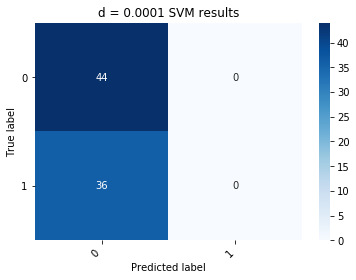




SVM model d = 0.001
Accuracy:0.55 
Cross Validation Error: 0.48110759493670874
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        44
           1       0.00      0.00      0.00        36

    accuracy                           0.55        80
   macro avg       0.28      0.50      0.35        80
weighted avg       0.30      0.55      0.39        80



C:\Users\shrik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


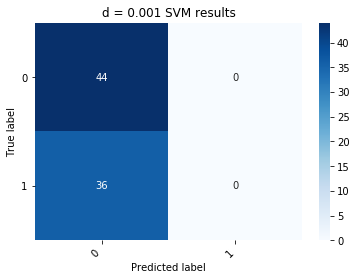




SVM model d = 0.01
Accuracy:0.8625 
Cross Validation Error: 0.1663607594936709
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.80      0.92      0.86        36

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



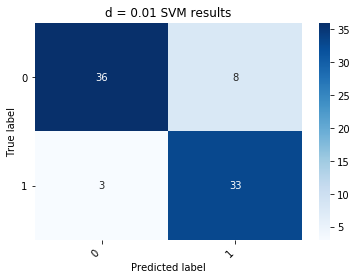




SVM model d = 1
Accuracy:0.9125 
Cross Validation Error: 0.3808860759493671
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.91      0.89      0.90        36

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



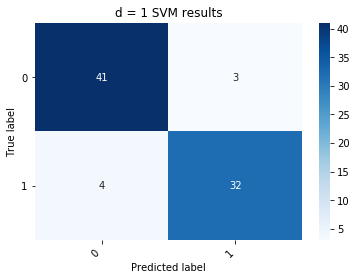

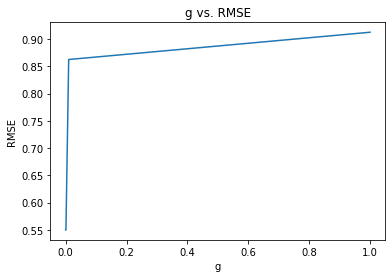

In [41]:
#Choosing the d to iterate on
g = [0.0001, 0.001, 0.01, 1]
RMM2 = []
for i in g:
    
    
     #Initializing a SVM 
    model = SVC(kernel = 'rbf', C = 1, gamma = i)
    
    #Fitting model using d values
    model.fit(X_train, y_train)
    
    #Predicting values using said parameters
    y_pred = model.predict(X_test)
    
    print('SVM model d = '+str(i))
    #Saving accuracy score of the model in a list
    print('Accuracy:{} '.format(accuracy_score(y_test, y_pred)))
    
   
    scores = cross_val_score(model, X, y, cv=5)
    
    RMM2.append(model.score(X_test, y_test))
    print('Cross Validation Error: {}'.format(str(1 - scores.mean())))
    
    print(classification_report(y_test, y_pred))

    confusion = confusion_matrix(y_test, y_pred)
    
    classnames = list(set(y_train))
    
    #creating a data frame containing confusion matrix data
    dataplot = pd.DataFrame(np.mat(confusion), index=classnames, columns=classnames)
    
    #Plotting a graph on the confusion matrix data
    plt.figure()
    heatmap = sns.heatmap(dataplot, annot=True, cmap="Blues")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('d = '+ str(i) + ' SVM results')
    plt.show()    
    print("\n\n")

plt.plot(g, RMM2)
plt.title('g vs. RMSE')
plt.xlabel('g')
plt.ylabel('RMSE')
plt.show()

With increasing gamma values, our model's accuracy keeps increasing, this is shown in the graph above. g = 1 is best